In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'1.0.3'

In [92]:
fire_data = pd.read_csv('fire/data/fires_spain_since_2010.csv',
                        usecols=['lat', 'lon', 'fire_val', 'date'],
                        parse_dates=['date'])
tourism_data = pd.read_csv("tourism/data.csv")

tourism_data.shape, fire_data.shape

((93586, 5), (53134, 4))

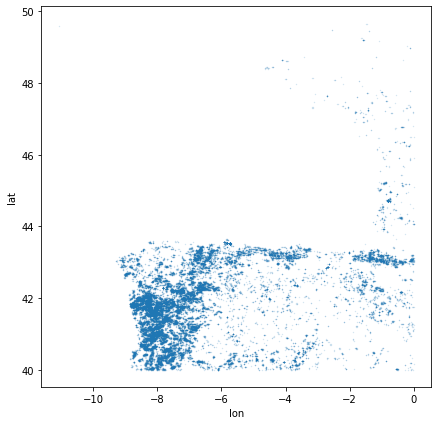

In [105]:
fire_data.plot.scatter(x="lon", y="lat", s=.1, alpha=.25, figsize=(7,7))

In [107]:
# remove French fires
lat_min = fire_data.lat.min()
lat_max = 44
lon_min = fire_data.lon.min()
lon_max = fire_data.lon.max()
lat_min, lat_max, lon_min, lon_max

(40.00416666307717, 44, -11.074072802086604, -0.005452863573010914)

In [108]:
# fire data is available for more regions => filter approx to tourism data
df = (
    fire_data
    .query("lat.between(@lat_min, @lat_max)")
    .query("lon.between(@lon_min, @lon_max)")
)

In [109]:
df.dtypes

lat                float64
lon                float64
fire_val           float64
date        datetime64[ns]
dtype: object

In [110]:
# What was the most recent fire in our data dump?
df.date.max()

Timestamp('2020-04-14 00:00:00')

In [111]:
# df['date'].groupby([df.date.year, df.date.month]).agg('count')
# df['week/year'] = df['date'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['week'] = df['date'].apply(lambda x: x.week)
df['year'] = df['date'].apply(lambda x: x.year)

In [112]:
df_historic = df[df['year'] < 2020]
df_thisyear = df[df['year'] == 2020]

In [113]:
num_weeks = 20  # limit to first weeks of the year, because April is the interesting Corona month
df_counts_historic = df_historic[df_historic['week'] < num_weeks].groupby(['week', 'year'])['lat'].agg('count')
df_counts_thisyear = df_thisyear[df_thisyear['week'] < num_weeks].groupby(['week', 'year'])['lat'].agg('count')


In [114]:
df_mean_historic = df_counts_historic.groupby('week').agg('mean')

In [115]:
df_counts_thisyear.get((11, 2020))

42

In [116]:
from matplotlib.patches import Ellipse

In [137]:
df_counts_thisyear.fillna(0)

week  year
1     2020     14
2     2020     14
3     2020     18
4     2020      6
6     2020     55
7     2020     24
8     2020     59
9     2020    181
10    2020      2
11    2020     42
12    2020      4
13    2020     35
14    2020     16
15    2020      6
16    2020      1
Name: lat, dtype: int64

## Careful: Not every week had fires

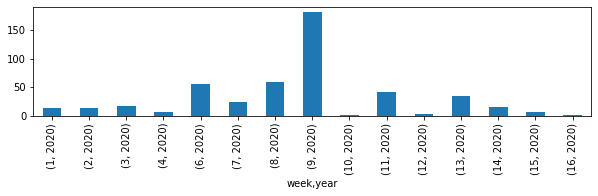

In [140]:
df_counts_thisyear.plot.bar(figsize=(10,2))

In [148]:
# prepare values for plotting, include explicit values for each week (including zeros)
num_per_week_thisyear = [df_counts_thisyear.get((week_idx, 2020)) or 0 for week_idx in range(num_weeks)]

num_per_week_thisyear

[0, 14, 14, 18, 6, 0, 55, 24, 59, 181, 2, 42, 4, 35, 16, 6, 1, 0, 0, 0]

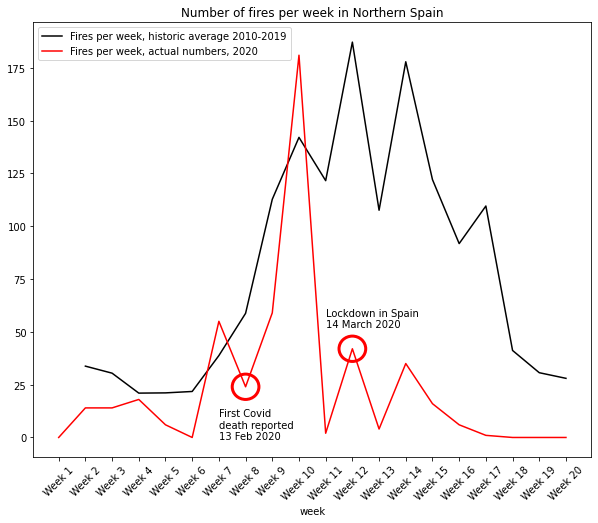

In [160]:
# Plot fires, and highlight Corona events in spain
# Dates taken from https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Spain

fig, ax = plt.subplots(figsize=(10,8))

# ax = df_mean_historic.plot(ax=ax, kind='line', x='x', y='y', c='k', label="Fires per week, historic average 2010-2019")
# ax = df_counts_thisyear.plot(ax=ax, kind='line', x='x', y='y', c='r', label="Fires per week, actual numbers, 2020")

ax = df_mean_historic.plot(ax=ax, kind='line', c='k', label="Fires per week, historic average 2010-2019")
# ax = df_counts_thisyear.plot(ax=ax, kind='line', c='r', label="Fires per week, actual numbers, 2020")
plt.plot(num_per_week_thisyear, 'r', label="Fires per week, actual numbers, 2020")

# highlight first Corona death, 13 Feb 2020
week_firstdeath_spain = 7
x_value_firstdeath = df_counts_thisyear.get((week_firstdeath_spain, 2020))
circle = Ellipse((week_firstdeath_spain, x_value_firstdeath), 1, 12, lw=3, color='red', fill=False)
ax.add_artist(circle)
plt.text(week_firstdeath_spain-1, x_value_firstdeath-25, "First Covid\ndeath reported\n13 Feb 2020")

# highlight lockdown
week_lockdown_spain = 11  # lockdown put in place 14 Mar 2020. This is week 11
x_value_lockdown = df_counts_thisyear.get((week_lockdown_spain, 2020))
# plt.plot(week_lockdown_spain, x_value_lockdown, 'g*')
circle = Ellipse((week_lockdown_spain, x_value_lockdown), 1, 12, lw=3, color='red', fill=False)
ax.add_artist(circle)
plt.text(week_lockdown_spain-1, x_value_lockdown+10, "Lockdown in Spain\n14 March 2020")

loc, labels = plt.xticks()
xticks = [f"Week {n+1}" for n in range(num_weeks)]

plt.legend(loc='best')
plt.xticks(range(num_weeks), xticks, rotation=45)
plt.title("Number of fires per week in Northern Spain")
plt.show()

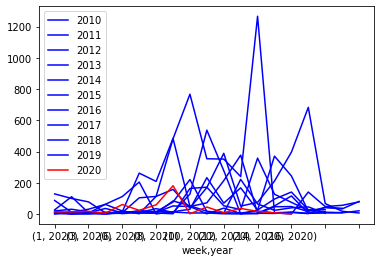

In [122]:
fig, ax = plt.subplots()
colors = {
    2009: 'b',
    2010: 'b',
    2011: 'b',
    2012: 'b',
    2013: 'b',
    2014: 'b',
    2015: 'b',
    2016: 'b',
    2017: 'b',
    2018: 'b',
    2019: 'b',
    2020: 'r',
}

# TODO: Split in "historic average till 2019 VS "current year 2020"
for key, grp in df_agg.groupby(['year']):
    ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=colors[key], label=key)
    
# # Current year
# for key, grp in df_agg[2020:].groupby(['year']):
#     ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=colors[key], label=key)

plt.legend(loc='best')
plt.show()

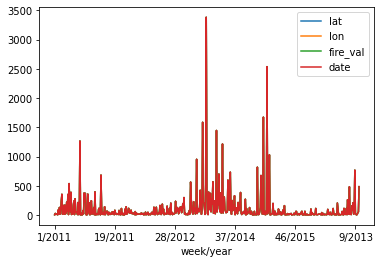

In [26]:
df.groupby('week/year').agg('count').plot()